In [5]:
import pandas as pd

df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Handle 'Time' parsing
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
df['Time of Day'] = pd.cut(df['Time'], bins=[0, 6, 12, 18, 24], 
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)


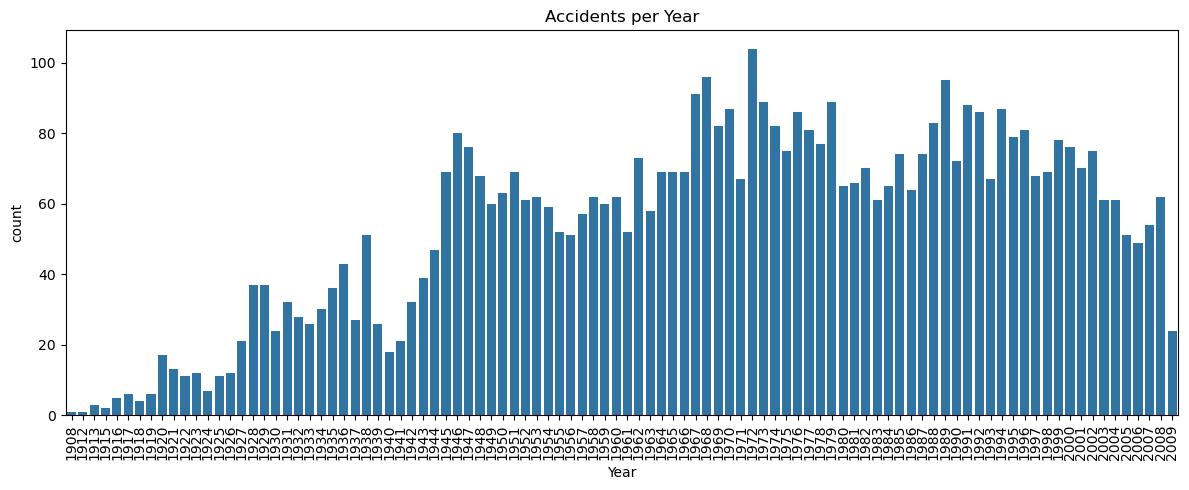

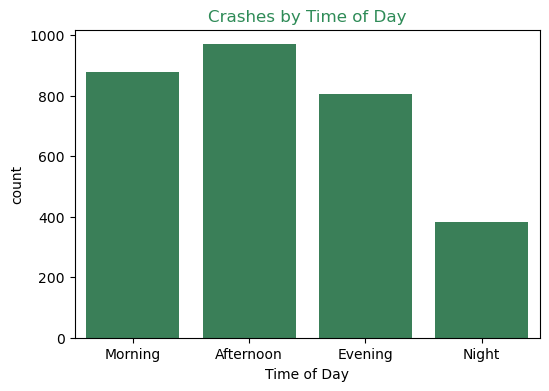

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly trend
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Year')
plt.xticks(rotation=90)
plt.title('Accidents per Year')
plt.tight_layout()
plt.show()

# Time of day trend
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Time of Day', order=['Morning', 'Afternoon', 'Evening', 'Night'],color= 'seagreen')
plt.title('Crashes by Time of Day' ,color= 'seagreen')
plt.show()


Total Weather-Related Accidents: 1585


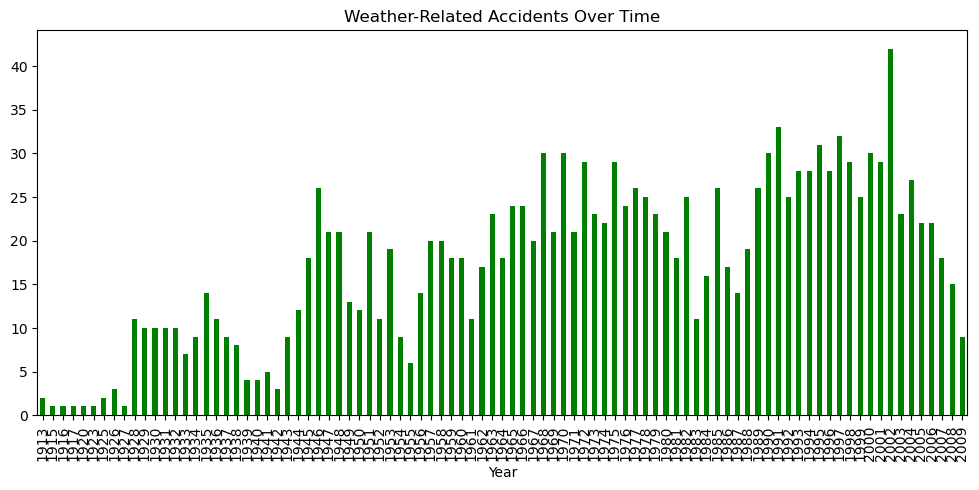

In [21]:
# Filter crash summaries containing weather keywords
weather_keywords = ['weather', 'storm', 'rain', 'wind', 'lightning', 'snow', 'fog', 'turbulence']
weather_accidents = df[df['Summary'].str.contains('|'.join(weather_keywords), case=False, na=False)]

print("Total Weather-Related Accidents:", len(weather_accidents))

# Yearly weather accident trend
weather_trend = weather_accidents.groupby('Year').size()
weather_trend.plot(kind='bar', figsize=(12, 5), title='Weather-Related Accidents Over Time', color='green')
plt.show()


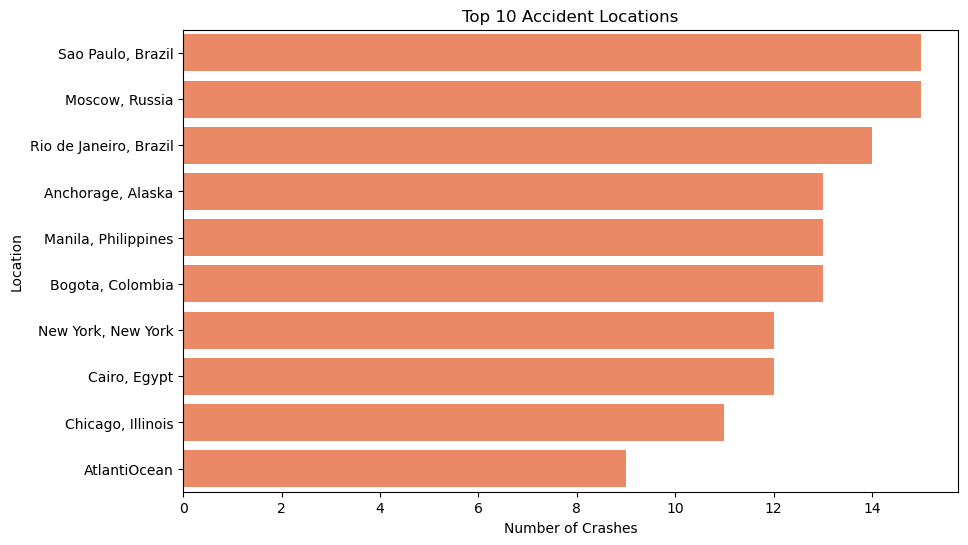

In [19]:
# Count crashes by Location
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, color='coral')
plt.title('Top 10 Accident Locations')
plt.xlabel('Number of Crashes')
plt.ylabel('Location')
plt.show()


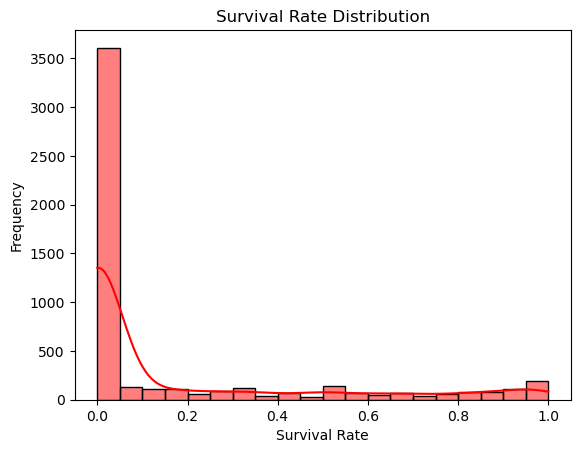

In [17]:
# Crew vs. Passenger fatality ratio
df['Total Aboard'] = df['Aboard']
df['Total Fatalities'] = df['Fatalities']
df['Survival Rate'] = 1 - (df['Fatalities'] / df['Aboard'])

sns.histplot(df['Survival Rate'].dropna(), bins=20, kde=True, color='red')
plt.title("Survival Rate Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()
